In [235]:
import numpy as np
from keras.datasets import mnist  # 手書き文字認識のデータセットが入ってます。

from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

👆必要なものをインポートしておきます。今回はCNNなので、Conv2DやMaxPooling2Dもインポートします。

In [236]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

👆画像を取り入れます。
x_train: 訓練画像, y_train: x_trainに対応する数字の答え, x_test: テスト画像, y_test: x_testに対応する数字の答え。

In [237]:
import matplotlib.pyplot as plt  # 画像を描画するツール
%matplotlib inline

👆このエディタ(jupyter notebook)に表示させるためのコマンドです。

In [238]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

👆CNNではチャンネルを次元として増やすので、（０から数えて）３次元に増やしておきます。

In [239]:
x_train = x_train / 255.0
x_test = x_test / 255.0

精度を上げるために、正規化しておきます。

In [240]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

👆0-9の答えを行列に変換しておきます。np.eye(10)は(10,10)の単位行列です。

In [241]:
x_train.shape

(60000, 28, 28, 1)

訓練画像の情報を表示してみました。28×28の画像が60000枚、チャンネルは１、ということです。

In [242]:
y_train.shape

(60000, 10)

訓練画像の答え情報を表示してみました。

In [243]:
input_shape = (28, 28, 1)
num_classes = 10

👆入れるデータは28×28、1チャンネルの情報として、答えは0-9の10種類（クラス）と設定します。

In [244]:
x_in = Input(shape=input_shape, name='input')
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x_in)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
#prediction = Dense(num_classes, activation='relu')(x)
prediction = Dense(num_classes, activation='softmax', name='prediction')(x)
model = Model(x_in, prediction)
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

👆答えの予測方法を設定します。（ここでは２段階のフィルタと情報選択をして答えを決めることにします。）

In [245]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               102528    
__________

今の設定を表示しておきました。

In [246]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.2364 - acc: 0.9320 - val_loss: 0.0588 - val_acc: 0.9827
Epoch 2/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0575 - acc: 0.9823 - val_loss: 0.0447 - val_acc: 0.9838
Epoch 3/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0409 - acc: 0.9877 - val_loss: 0.0381 - val_acc: 0.9883
Epoch 4/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.0319 - acc: 0.9902 - val_loss: 0.0342 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.0262 - acc: 0.9915 - val_loss: 0.0354 - val_acc: 0.9880
Epoch 6/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0215 - acc: 0.9930 - val_loss: 0.0272 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.0180 - acc: 0.9945 - val_loss: 0.

👆「60000個の教師データで学び、10000個のデータから128個選んでテストしてみる」という学習を10回繰り返します。毎回、正解率（Accuracy)と不正解率（Loss)を表示しています。（「正確さ（Accuracy）」が１に近づくように、学習していきます。）

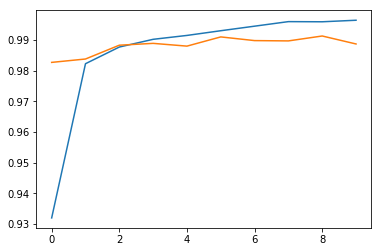

In [248]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

学習の成果を表示しました。オレンジは教師データでの学習結果、青はテストの結果です。学習するに従って正確に手書きの文字を認識できるようになっています。